In [77]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [78]:
ticker = 'TCS.NS'
start_date = '2024-06-01'
end_date = '2024-12-20'

In [79]:
tcs_data = yf.download(ticker, start=start_date, end=end_date)
print(tcs_data)

[*********************100%***********************]  1 of 1 completed

Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2024-06-03  3685.279297  3702.850098  3751.550049  3696.000000  3732.800049   
2024-06-04  3697.371582  3715.000000  3745.000000  3591.500000  3700.000000   
2024-06-05  3728.672363  3746.449951  3783.800049  3700.000000  3716.000000   
2024-06-06  3812.223877  3830.399902  3839.899902  3741.500000  3781.000000   
2024-06-07  3875.472412  3893.949951  3915.000000  3837.300049  3837.300049   
...                 ...          ...          ...          ...          ...   
2024-12-13  4473.899902  4473.899902  4494.899902  4394.399902  4434.950195   
2024-12-16  4415.200195  4415.200195  4475.000000  4397.000000  4459.000000   
2024-12-17  4328.500000  4328.500000  4432.950195  4318.000000  4410.000000   
2024-12-18  4347.850098  4347.850098  4362.000000  4

In [80]:
print(tcs_data.head())

Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2024-06-03  3685.279297  3702.850098  3751.550049  3696.000000  3732.800049   
2024-06-04  3697.371582  3715.000000  3745.000000  3591.500000  3700.000000   
2024-06-05  3728.672363  3746.449951  3783.800049  3700.000000  3716.000000   
2024-06-06  3812.223877  3830.399902  3839.899902  3741.500000  3781.000000   
2024-06-07  3875.472412  3893.949951  3915.000000  3837.300049  3837.300049   

Price        Volume  
Ticker       TCS.NS  
Date                 
2024-06-03  2156773  
2024-06-04  3395997  
2024-06-05  2799670  
2024-06-06  4328036  
2024-06-07  4552445  


In [81]:
print(tcs_data.tail())

Price         Adj Close        Close         High          Low         Open  \
Ticker           TCS.NS       TCS.NS       TCS.NS       TCS.NS       TCS.NS   
Date                                                                          
2024-12-13  4473.899902  4473.899902  4494.899902  4394.399902  4434.950195   
2024-12-16  4415.200195  4415.200195  4475.000000  4397.000000  4459.000000   
2024-12-17  4328.500000  4328.500000  4432.950195  4318.000000  4410.000000   
2024-12-18  4347.850098  4347.850098  4362.000000  4289.600098  4311.700195   
2024-12-19  4271.899902  4271.899902  4364.000000  4262.000000  4282.000000   

Price        Volume  
Ticker       TCS.NS  
Date                 
2024-12-13  1967048  
2024-12-16  1646224  
2024-12-17  3225027  
2024-12-18  1575404  
2024-12-19  3015763  


In [82]:
tcs_data.columns

MultiIndex([('Adj Close', 'TCS.NS'),
            (    'Close', 'TCS.NS'),
            (     'High', 'TCS.NS'),
            (      'Low', 'TCS.NS'),
            (     'Open', 'TCS.NS'),
            (   'Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])

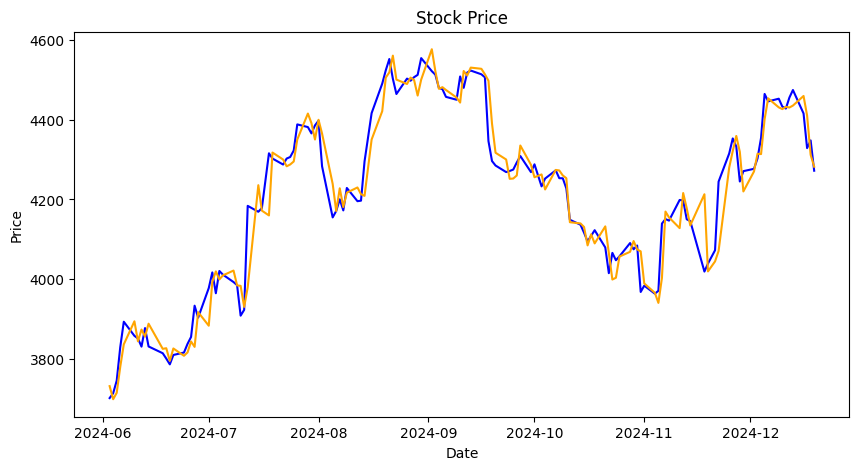

In [83]:
plt.figure(figsize=(10,5))
plt.plot(tcs_data['Close'], label='Close Price', color ='blue')
plt.plot(tcs_data['Open'], label = 'Open Price', color = 'orange')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [84]:
#Check Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(tcs_data['Close'])
print("ADF Statics :",result[0])
print ("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary")
else:
    print("The data is not stationary. Differencing required.")


ADF Statics : -1.884240545156213
p-value : 0.3395107849898073
The data is not stationary. Differencing required.


In [85]:
#Differencing
tcs_data['Close_differencing']=tcs_data['Close'].diff().dropna()
#Checking data is stationary or not
result= adfuller(tcs_data['Close_differencing'].dropna())
print("ADF Statics :",result[1])
print("p-value :",result[1])
if(result[1]<=0.05):
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing might be required.")

ADF Statics : 4.57930693661211e-09
p-value : 4.57930693661211e-09
The data is stationary.


Autocorrelation and Partial Autocorrelation

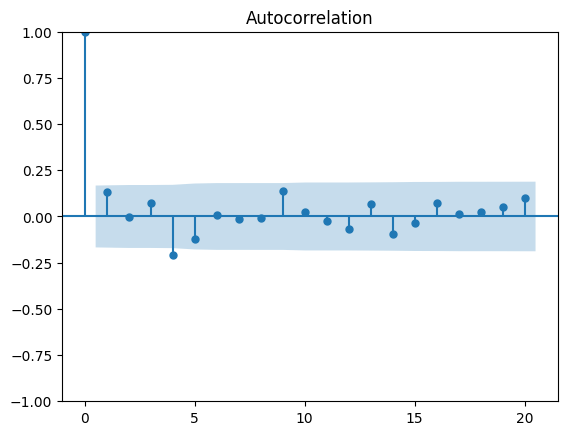

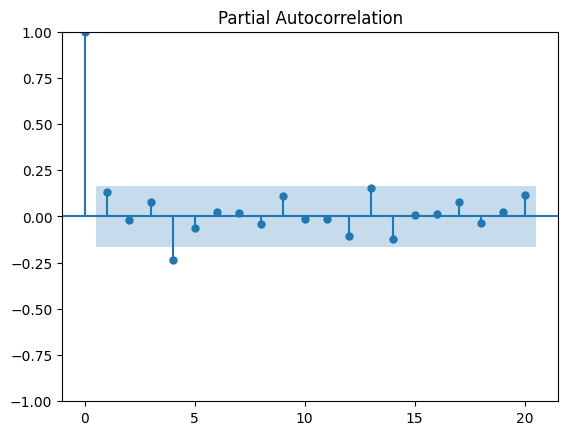

In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(tcs_data["Close_differencing"].dropna(),lags=20)
plot_pacf(tcs_data["Close_differencing"].dropna(),lags=20)
plt.show()

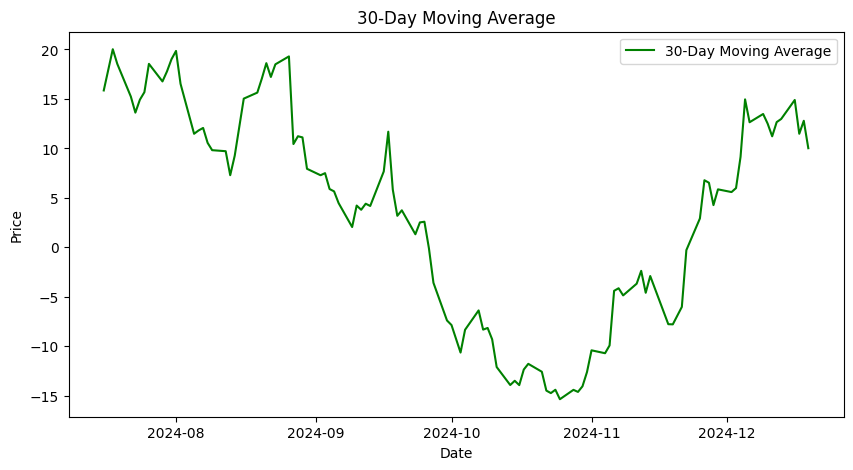

In [87]:
#Calculate 30 day Moving Average
tcs_data['30_day_MA'] = tcs_data['Close_differencing'].rolling(window=30).mean()

#Plotting the Moving Average
plt.figure(figsize=(10,5))
plt.plot(tcs_data['30_day_MA'],label ='30-Day Moving Average', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('30-Day Moving Average')
plt.legend()
plt.show()
         

In [88]:
print(tcs_data.columns)

MultiIndex([(         'Adj Close', 'TCS.NS'),
            (             'Close', 'TCS.NS'),
            (              'High', 'TCS.NS'),
            (               'Low', 'TCS.NS'),
            (              'Open', 'TCS.NS'),
            (            'Volume', 'TCS.NS'),
            ('Close_differencing',       ''),
            (         '30_day_MA',       '')],
           names=['Price', 'Ticker'])


In [89]:
#Fitting the ARIMA Model
model = ARIMA(tcs_data['Close'], order=(4,0,4))
arima_result = model.fit()
print(arima_result.summary())

C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                  138
Model:                 ARIMA(4, 0, 4)   Log Likelihood                -743.483
Date:                Sat, 21 Dec 2024   AIC                           1506.966
Time:                        18:31:04   BIC                           1536.239
Sample:                             0   HQIC                          1518.862
                                - 138                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4203.9407    164.317     25.584      0.000    3881.886    4525.996
ar.L1          1.1710      1.180      0.992      0.321      -1.142       3.484
ar.L2         -0.6054      0.498     -1.216      0.2

C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
import pandas as pd
start_date = pd.to_datetime("2024-11-01")
end_date = pd.to_datetime("2024-12-19")


In [91]:
#Check if the dates are within the range of the index
if start_date not in tcs_data.index or end_date not in tcs_data.index:
    print(f"The start_date or end_date is not found in the tcs_data's index. Availabe dates are:")
    print(tcs_data.index.min(), "to", tcs_data.index.max())
else:
    predicted_data = arima_result.predict(start=start_date, end=end_date,typ="level")
    print(tcs_data['Close'].tail(10))
    print("\n Predicted Data")
    print(predicted_data)
    

Ticker           TCS.NS
Date                   
2024-12-06  4445.500000
2024-12-09  4452.149902
2024-12-10  4432.549805
2024-12-11  4427.450195
2024-12-12  4454.950195
2024-12-13  4473.899902
2024-12-16  4415.200195
2024-12-17  4328.500000
2024-12-18  4347.850098
2024-12-19  4271.899902

 Predicted Data
Date
2024-11-01    3941.730474
2024-11-04    3985.833328
2024-11-05    3967.779764
2024-11-06    4001.681594
2024-11-07    4156.187309
2024-11-08    4150.689753
2024-11-11    4176.123078
2024-11-12    4180.162097
2024-11-13    4185.916389
2024-11-14    4172.488900
2024-11-18    4135.448217
2024-11-19    3973.831368
2024-11-21    4069.017638
2024-11-22    4086.271387
2024-11-25    4274.691749
2024-11-26    4322.264287
2024-11-27    4372.771999
2024-11-28    4304.803773
2024-11-29    4217.027512
2024-12-02    4284.243153
2024-12-03    4274.606577
2024-12-04    4306.403458
2024-12-05    4354.849993
2024-12-06    4482.794590
2024-12-09    4439.745147
2024-12-10    4442.710525
2024-12-11    

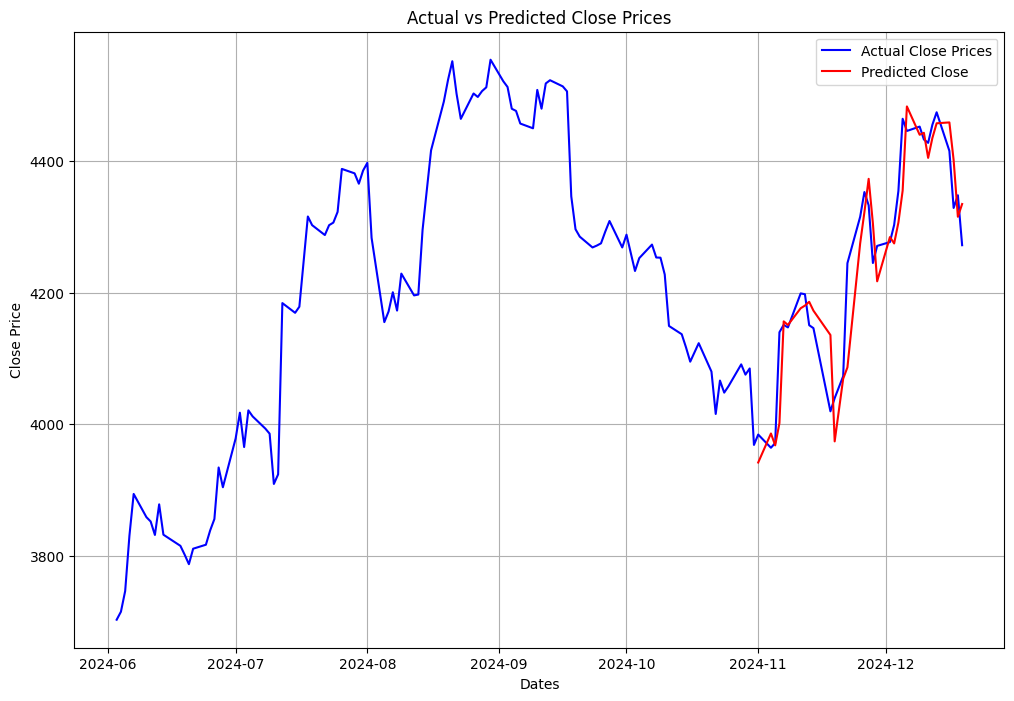

In [92]:
#Plot Actual and Predicted Data
plt.figure(figsize=(12,8))
plt.plot(tcs_data.index,tcs_data['Close'],label ='Actual Close Prices',color='blue')
plt.plot(predicted_data.index,predicted_data, label = 'Predicted Close', color='red')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Dates")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

In [93]:
#Fit the ARIMA model
model = ARIMA (tcs_data['Close'], order=(4,0,4))
arima_result = model.fit()

start_date = pd.to_datetime("2024-11-01")
end_date = pd.to_datetime("2024-12-19")

if start_date not in tcs_data.index or end_date not in tcs_data.index:
    print(f"The start_date or end_date is not found in the tcs_data's index.Available dates are:")
    print (data.index.min(), "to", data.index.max())
else:
    predicted_data = arima_result.predict()
    print(tcs_data['Close'].tail(10))
    print("\n Predicted Data")
    print(predicted_data)
    

C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Ticker           TCS.NS
Date                   
2024-12-06  4445.500000
2024-12-09  4452.149902
2024-12-10  4432.549805
2024-12-11  4427.450195
2024-12-12  4454.950195
2024-12-13  4473.899902
2024-12-16  4415.200195
2024-12-17  4328.500000
2024-12-18  4347.850098
2024-12-19  4271.899902

 Predicted Data
Date
2024-06-03    4203.940665
2024-06-04    3714.711607
2024-06-05    3730.370367
2024-06-06    3763.686180
2024-06-07    3855.751749
                 ...     
2024-12-13    4457.171251
2024-12-16    4458.487753
2024-12-17    4401.260270
2024-12-18    4315.077195
2024-12-19    4334.515184
Name: predicted_mean, Length: 138, dtype: float64


C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


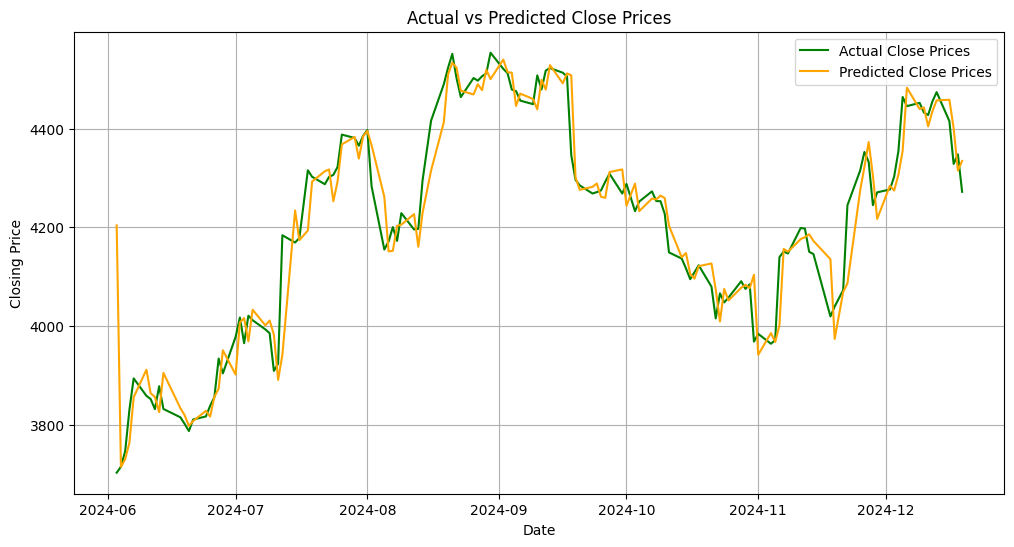

In [94]:
plt.figure(figsize=(12,6))
plt.plot(tcs_data.index, tcs_data['Close'], label='Actual Close Prices',color= 'green')
plt.plot (predicted_data.index, predicted_data, label='Predicted Close Prices', color='orange')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


In [95]:
#Forecast next 10 days
forecast_steps =10
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=tcs_data.index[-1] +pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Mahi\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


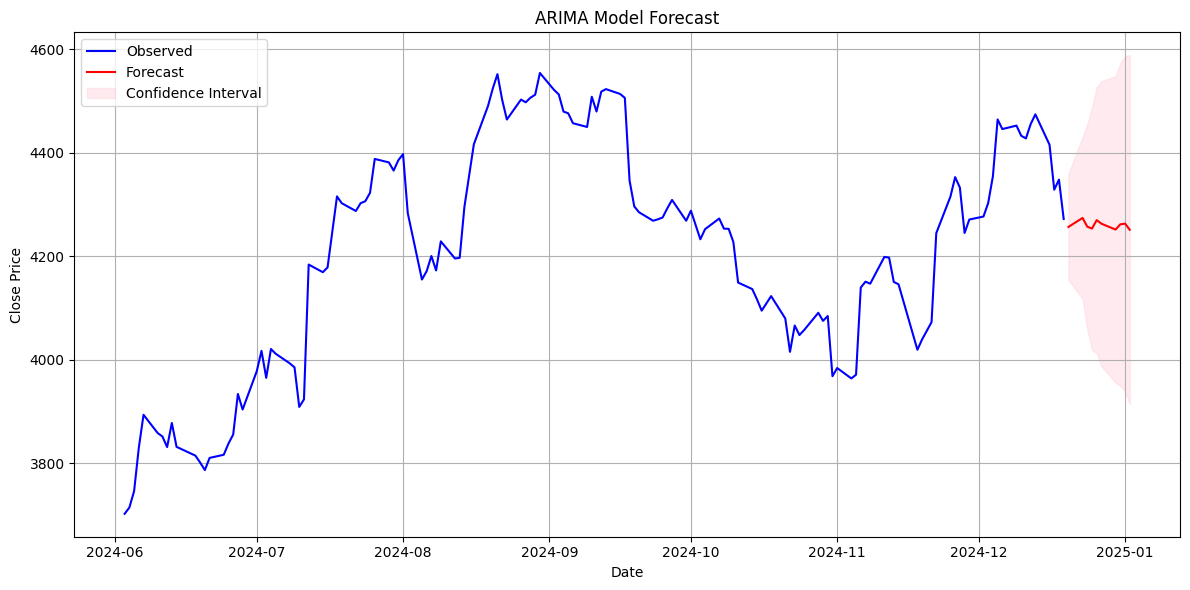

In [76]:
plt.figure(figsize=(12,6))
plt.plot(tcs_data.index, tcs_data['Close'], label ='Observed', color='blue')
plt.plot(forecast_index,forecast_mean, label='Forecast',color='red')
plt.fill_between(
    forecast_index,
    forecast_ci.iloc[:,0],
    forecast_ci.iloc[:,1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval'
)

plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.show()